In [1]:
import numpy as np
def read_text(file_name) :
    file = file_path + file_name
    with open(file, 'r', encoding = 'UTF-8') as f:
        s = f.read().splitlines()
    return s

In [2]:
file_path= 'C:/users/juwon/practice_aiffel/gd_nlp/seq2seq/'

enc_train_path = 'korean-english-park.train.ko'
dec_train_path = 'korean-english-park.train.en'
enc_test_path = 'korean-english-park.test.ko'
dec_test_path = 'korean-english-park.test.en'

In [3]:
enc_train = read_text(enc_train_path)
dec_train = read_text(dec_train_path)
enc_test = read_text(enc_test_path)
dec_test = read_text(dec_test_path)

In [4]:
print(len(enc_train))
print(len(dec_train))
print(len(enc_test))
print(len(dec_test))

94123
94123
2000
2000


In [5]:
import random
a = random.randint(0,2000)
for i in range(a,a+10) :
    print('Korean  >>', enc_test[i])
    print('English >>', dec_test[i])
    print()

Korean  >> 미 중앙은행의 수장인 버냉키는 “수많은 금융시장과 연구기관들이 어두운 미국 경기전망 때문에 상당한 스트레스를 받고 있다”며 “이런 이유로 경제에 대한 신뢰 구축이 이뤄지지 않고 있다”고 말했다.
English >> The nation's top central banker warned "many financial markets and institutions remain under considerable stress, in part because the outlook for the economy, and thus for credit quality, remains uncertain.

Korean  >> 이날 미 상원 금융위원회는 버냉키 의장으로부터 미국 경제 전망과 모기지 금융회사인 페니매와 프레디맥 부실화에 따른 은행의 위기에 대해서 들었다.
English >> The Senate panel was meeting to hear from Bernanke about the economy and to consider the crisis at mortgage finance giants Fannie Mae and Freddie Mac, as well as growing fears about bank failures.

Korean  >> 페니매와 프레디맥의 주가는 15일 미 재무부의 긴급지원 발표에도 불구하고 하락세를 이어갔다.
English >> Shares of Fannie and Freddie on Tuesday continued the recent slide that has prompted the Treasury Department and Fed to step in and offer support.

Korean  >> 페니매의 주가는 15일 하루에만 27% 하락했고 이달들어 64% 폭락했다.
English >> Shares of Fannie (FNM, Fortune 500) plunged 27% on Tuesday, leaving them 6

In [6]:
ko_raw = enc_train + enc_test
en_raw = dec_train + dec_test

In [7]:
sen_zip = set(zip(ko_raw, en_raw))
cleaned_ko, cleaned_en = zip(*sen_zip)

In [8]:
print(len(cleaned_ko), len(cleaned_en))

80963 80963


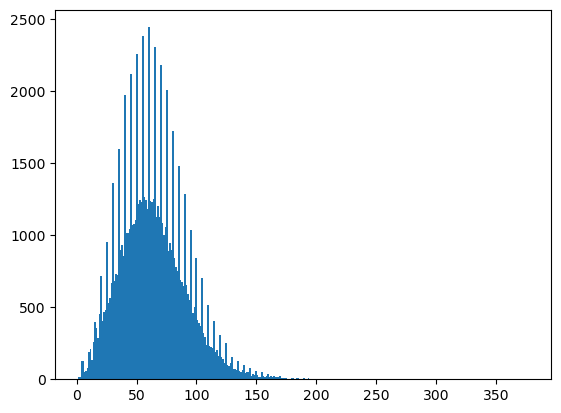

In [9]:
import matplotlib.pyplot as plt
len_sen = [len(sen) for sen in cleaned_ko]
plt.hist(len_sen, bins=300)
plt.show()

In [10]:
idx_list = []
count = 0
for i,length in enumerate(len_sen):
    if length < 15 :
        print('문장의 길이:',length)
        print('한 번역: ', cleaned_ko[i])
        print('영 번역: ', cleaned_en[i])
        count +=1
    if count == 50 : break

문장의 길이: 8
한 번역:  도살장, 수라장
영 번역:  The head of Iraqi forces in Falluja said they had found ""slaughterhouses"" where hostages had been held and killed, along with records of victims.
문장의 길이: 6
한 번역:  원문기사보기
영 번역:  But it didn't work out that way.
문장의 길이: 11
한 번역:  그는 "잘 모르겠다.
영 번역:  All rights reserved.
문장의 길이: 12
한 번역:  원문 & 독해설명 인쇄
영 번역:  The pipeline links Iraq's northern and southern oil fields.
문장의 길이: 12
한 번역:  그것은 진실이 아니다.
영 번역:  This material may not be published.
문장의 길이: 14
한 번역:  후임자는 발표되지 않았다.
영 번역:  No successors have been announced.
문장의 길이: 14
한 번역:  저장된 검색어가 없습니다.
영 번역:  And oil is trading near $55 a barrel.
문장의 길이: 12
한 번역:  fraud 사기, 속임
영 번역:  Lee won a landslide victory in the Dec.
문장의 길이: 12
한 번역:  원문 & 독해설명 인쇄
영 번역:  The move follows the controversy over an incident of alleged indecent exposure that took place during a live music show aired on MBC last Saturday.
문장의 길이: 14
한 번역:  온몸으로 말하는 기상캐스터
영 번역:  "It changed the patient-physician relationship.
문장의 길이: 9
한 번역:  와인의

In [11]:
import re

def preprocessing_ko(sentence):
    sentence = re.sub(r'\([^)]*\)', r'', sentence) # 괄호안 문자 제거
    sentence = re.sub(r'[^가-힣a-zA-Z0-9.,?!~\'\"]', r' ', sentence)
    sentence = re.sub(r'[" "]+', r' ', sentence)
    
    return sentence

def preprocessing_en(sentence):
    sentence = sentence.lower().strip()
    sentence = re.sub(r'\([^)]*\)', r'', sentence) # 괄호안 문자 제거
    sentence = re.sub(r'([.,?!])', r' \1 ', sentence)
    sentence = re.sub(r'[" "]+', r' ', sentence)
    sentence = re.sub(r'[^a-zA-Z0-9.,?!~\'\"]+', r' ', sentence)
    sentence = sentence.strip()
    
    sentence = '<start> '+ sentence + ' <end>'
    return sentence

In [12]:
kor_corpus = []
eng_corpus = []
for idx, sentence in enumerate(cleaned_ko):
    if len(sentence) >=15 :
        kor_corpus.append(preprocessing_ko(sentence))
        eng_corpus.append(preprocessing_en(cleaned_en[idx]))

In [13]:
from eunjeon import Mecab
mecab =Mecab()

encoder_input = []
decoder_input = []

for idx, sentence in enumerate(kor_corpus) :
    enc_sen = mecab.morphs(sentence)
    dec_sen = eng_corpus[idx].split()
    if (len(enc_sen) <= 40) & (len(dec_sen)<=40):
        encoder_input.append(enc_sen)
        decoder_input.append(dec_sen)

In [14]:
encoder_input = random.sample(encoder_input,15000)
decoder_input = random.sample(decoder_input,15000)

In [15]:
print(len(encoder_input))
print(len(decoder_input))

15000
15000


In [16]:
import tensorflow as tf

def tokenize(corpus):
    tokenizer = tf.keras.preprocessing.text.Tokenizer(filters = '')
    tokenizer.fit_on_texts(corpus)
    
    tensor = tokenizer.texts_to_sequences(corpus)
    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding = 'post')
    
    return tensor, tokenizer

In [17]:
encoder_input, ko_tokenizer = tokenize(encoder_input)
decoder_input, en_tokenizer = tokenize(decoder_input)

In [18]:
ko_word_index = ko_tokenizer.word_index
en_word_index = en_tokenizer.word_index

In [19]:
print(len(ko_word_index))
print(len(en_word_index))

23956
23254


In [20]:
en_index_word = {idx:word for word,idx in en_word_index.items()}

In [21]:
from sklearn.model_selection import train_test_split

enc_train, enc_val, dec_train, dec_val = train_test_split(encoder_input, 
                                                          decoder_input, 
                                                          test_size= 0.2)

## 모델 설계

In [22]:
class BahdanauAttention(tf.keras.layers.Layer):
    def __init__(self, units):
        super(BahdanauAttention, self).__init__()
        self.w_dec = tf.keras.layers.Dense(units)
        self.w_enc = tf.keras.layers.Dense(units)
        self.w_com = tf.keras.layers.Dense(1)
    
    def call(self, h_enc, h_dec):
        h_enc = self.w_enc(h_enc)
        h_dec = tf.expand_dims(h_dec, 1)
        h_dec = self.w_dec(h_dec)

        score = self.w_com(tf.nn.tanh(h_dec + h_enc))
        
        attn = tf.nn.softmax(score, axis=1)

        context_vec = attn * h_enc
        context_vec = tf.reduce_sum(context_vec, axis=1)

        return context_vec, attn

In [23]:
class Encoder(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, enc_units):
        super(Encoder, self).__init__()
        self.enc_units = enc_units
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        self.gru1 = tf.keras.layers.GRU(enc_units, return_sequences= True, dropout=0.3)
        self.gru2 = tf.keras.layers.GRU(enc_units, return_sequences= True, dropout=0.3)

    def call(self, x):
        out = self.embedding(x)
        out = self.gru1(out)
        out = self.gru2(out)
        return out

In [24]:
class Decoder(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, dec_units):
        super(Decoder, self).__init__()
        self.dec_units = dec_units
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        self.gru1 = tf.keras.layers.GRU(dec_units, return_sequences=True, dropout=0.3)
        self.gru2 = tf.keras.layers.GRU(dec_units, return_sequences=True, return_state= True, dropout=0.3)

        self.fc = tf.keras.layers.Dense(vocab_size)
        self.attention = BahdanauAttention(self.dec_units)

    def call(self, x, h_dec, enc_out):
        context_vec, attn = self.attention(enc_out, h_dec)
        out = self.embedding(x)
        out = tf.concat([tf.expand_dims(context_vec,1), out], axis = -1)
        out = self.gru1(out)
        out, h_dec = self.gru2(out)
        out = tf.reshape(out,(-1, out.shape[2]))
        out = self.fc(out)

        return out, h_dec, attn

## Optimizer & Loss

In [25]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.005)
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')

def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss = loss_object(real, pred)
    
    mask = tf.cast(mask, dtype=loss.dtype)
    loss *= mask
    
    return tf.reduce_mean(loss)

## train_step 구현

In [26]:
@tf.function
def train_step(src, tgt, encoder, decoder, optimizer, dec_tok):
    bsz = src.shape[0]
    loss = 0

    with tf.GradientTape() as tape:
        enc_out = encoder(src)
        h_dec = enc_out[:, -1]
        
        dec_src = tf.expand_dims([dec_tok.word_index['<start>']] * bsz, 1)

        for t in range(1, tgt.shape[1]):
            pred, h_dec, _ = decoder(dec_src, h_dec, enc_out)
            loss += loss_function(tgt[:, t], pred)
            dec_src = tf.expand_dims(tgt[:, t], 1)
    batch_loss = (loss / int(tgt.shape[1]))

    variables = encoder.trainable_variables + decoder.trainable_variables
    gradients = tape.gradient(loss, variables)
    optimizer.apply_gradients(zip(gradients, variables))
    
    return batch_loss

In [27]:
@tf.function
def eval_step(src, tgt, encoder, decoder,dec_tok):
    bsz = src.shape[0]
    loss = 0

    with tf.GradientTape() as tape:
        enc_out = encoder(src)
        h_dec = enc_out[:, -1]
        
        dec_src = tf.expand_dims([dec_tok.word_index['<start>']] * bsz,1)

        for t in range(1, tgt.shape[1]):
            pred, h_dec, _ = decoder(dec_src, h_dec, enc_out)
            loss += loss_function(tgt[:, t], pred)
            dec_src = tf.expand_dims(tgt[:,t], 1)
    batch_loss = (loss / int(tgt.shape[1]))

    return batch_loss

In [28]:

from tqdm import tqdm
import random

EPOCHS = 20
BATCH_SIZE = 128
units = 128
embedding_dim = 128
SRC_VOCAB_SIZE = len(ko_word_index)
TGT_VOCAB_SIZE = len(en_word_index)

val_loss = []
encoder = Encoder(SRC_VOCAB_SIZE, embedding_dim, units)
decoder = Decoder(TGT_VOCAB_SIZE, embedding_dim, units)

for epoch in range(EPOCHS):
    total_loss = 0
    idx_list = list(range(0, enc_train.shape[0], BATCH_SIZE))
    random.shuffle(idx_list)
    t= tqdm(idx_list)

    for batch, idx in enumerate(t):
        batch_loss = train_step(
            enc_train[idx:idx+BATCH_SIZE], 
            dec_train[idx:idx+BATCH_SIZE],
            encoder,
            decoder,
            optimizer,
            en_tokenizer) 
        total_loss += batch_loss
        t.set_description_str('Epoch %2d' % (epoch+1))
        t.set_postfix_str('Loss %.4f' % (total_loss.numpy() / (batch+1)))
        
    test_loss = 0 
    idx_list = list(range(0,enc_val.shape[0], BATCH_SIZE))
    random.shuffle(idx_list)
    t = tqdm(idx_list)
    
    for test_batch, idx in enumerate(t):
        test_batch_loss = eval_step(
            enc_val[idx: idx+BATCH_SIZE],
            dec_val[idx: idx+BATCH_SIZE],
            encoder,
            decoder,
            en_tokenizer)
        test_loss += test_batch_loss
        val_loss.append(test_loss.numpy() / (test_batch+1))

        t.set_description_str('Test Epoch %2d' % (epoch+1))
        t.set_postfix_str('Test Loss %.4f' % (test_loss.numpy() / (test_batch+1)))

Test Epoch 20: 100%|████████████████████████████████████████████████████| 24/24 [00:02<00:00,  9.80it/s, Test Loss nan]


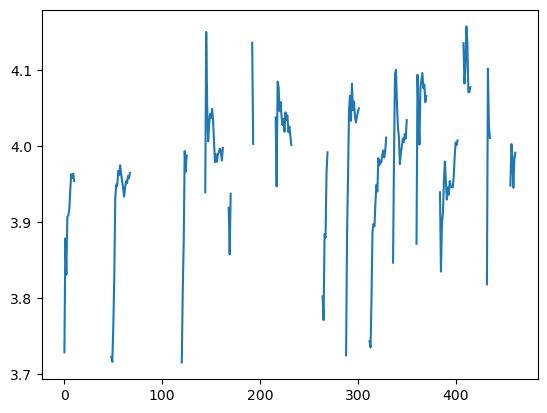

In [29]:
import matplotlib.pyplot as plt
plt.plot(val_loss)
plt.show()

In [30]:
def decode_sentence(sentence):
    sentence = preprocessing_ko(sentence)
    sentence = [ko_word_index[a] for a in mecab.morphs(sentence)]
    sentence = tf.keras.preprocessing.sequence.pad_sequences([sentence], padding='post', maxlen=40)
    
    enc_out = encoder(sentence)
    h_dec = enc_out[:, -1]
    dec_src = tf.expand_dims([en_word_index['<start>']],1)
    
    decoded_sentence = ''
    for i in range(dec_train.shape[-1]):
        pred, h_dec, _ = decoder(dec_src, h_dec, enc_out)
        pred_token_index = tf.argmax(tf.math.softmax(pred, axis =-1)[0]).numpy()
        if (pred_token_index) != 0 :
        
            decoded_sentence += en_index_word[pred_token_index] + ' '
        if (pred_token_index == en_word_index['<end>']) :
            
            return decoded_sentence
        
        dec_src = tf.expand_dims([pred_token_index],0)
        
        return decoded_sentence
        

In [31]:
print(decode_sentence('오바마는 말했다.'))
print(decode_sentence('사상자가 발생했습니다.'))
print(decode_sentence('혼자 해결은 역시 어렵습니다'))

the 
the 
the 


gpu메모리가 부족하여 모델을 복잡하게 만들 수 없었다.
train_loss와 val_loss가 nan값이 나와서 검색을 해보아도 나에게 맞는 이유는 없었다.
시간이 된다면 좀 더 성능을 높일 수 있는 방법을 찾아보아야 겠다.